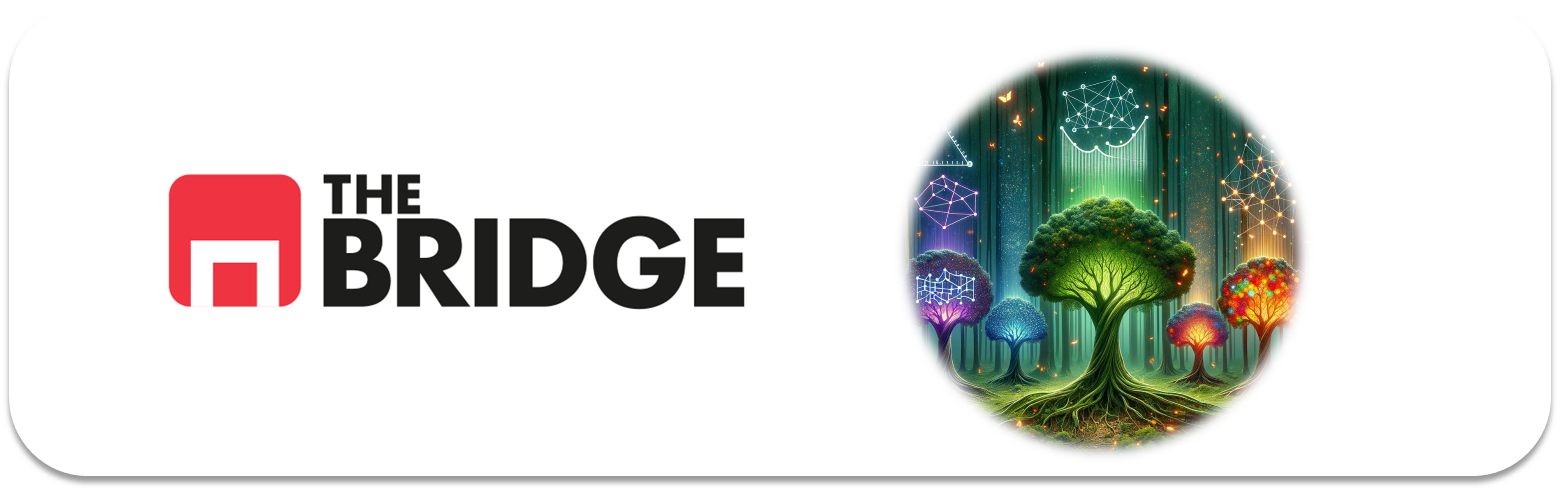

## PRACTICA OBLIGATORIA: **Ensamblado de modelos, bagging, boosting, random forest y gbts**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de obtención del mejor modelo para la resolución de un problema de clasificación sobre diabetes en la india. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,  cross_val_score, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

### Descripción del dataset

El dataset de los Pima Indians Diabetes contiene datos de un grupo de mujeres de al menos 21 años de edad de ascendencia india Pima que viven cerca de Phoenix, Arizona, EE. UU. Las características del dataset incluyen varios predictores médicos y un objetivo que indica si la paciente desarrolló diabetes dentro de cinco años.

### Características del Dataset

Las variables incluidas en el dataset son:

1. **Número de Embarazos**: Cantidad de veces embarazada.
2. **Concentración de Glucosa en Plasma**: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia oral a la glucosa.
3. **Presión Arterial Diastólica**: Presión arterial diastólica (mm Hg).
4. **Grosor del Pliegue Cutáneo del Tríceps**: Grosor del pliegue cutáneo del tríceps (mm).
5. **Insulina en Suero**: Insulina en suero a 2 horas (mu U/ml).
6. **Índice de Masa Corporal**: Peso en kg/(altura en m)^2.
7. **Función del Pedigree de Diabetes**: Una función que representa la predisposición genética a la diabetes.
8. **Edad**: Edad en años.
9. **Variable Objetivo**: Indica si la paciente desarrolló diabetes (1) o no (0).

### Carga de datos

El dataset lo puedes encontrar en la siguiente url y a continuación se proporciona una lista de nombres sugeridos para las columnas:


In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

### Enunciado

Construye el mejor modelo que puedas para predecir a partir de los datos de entrada si una mujer de la tribu Pima desarrollará diabetes. Para ello obtén al menoss tres modelos a partir de tecnologías de bagging y boosting (al menos uno de cada), compáralos sin utilizar el test y selecciona uno de ellos como el mejor (justificándolo). Termina el ejercicio probando el modelo seleccionado y con sus hiperparámetros optimizados contra un dataset de test que deberás haber reservado con anterioridad.

In [3]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", names = names)
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
target = "class"

In [7]:
df[target].value_counts()

class
0    500
1    268
Name: count, dtype: int64

In [11]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 73)

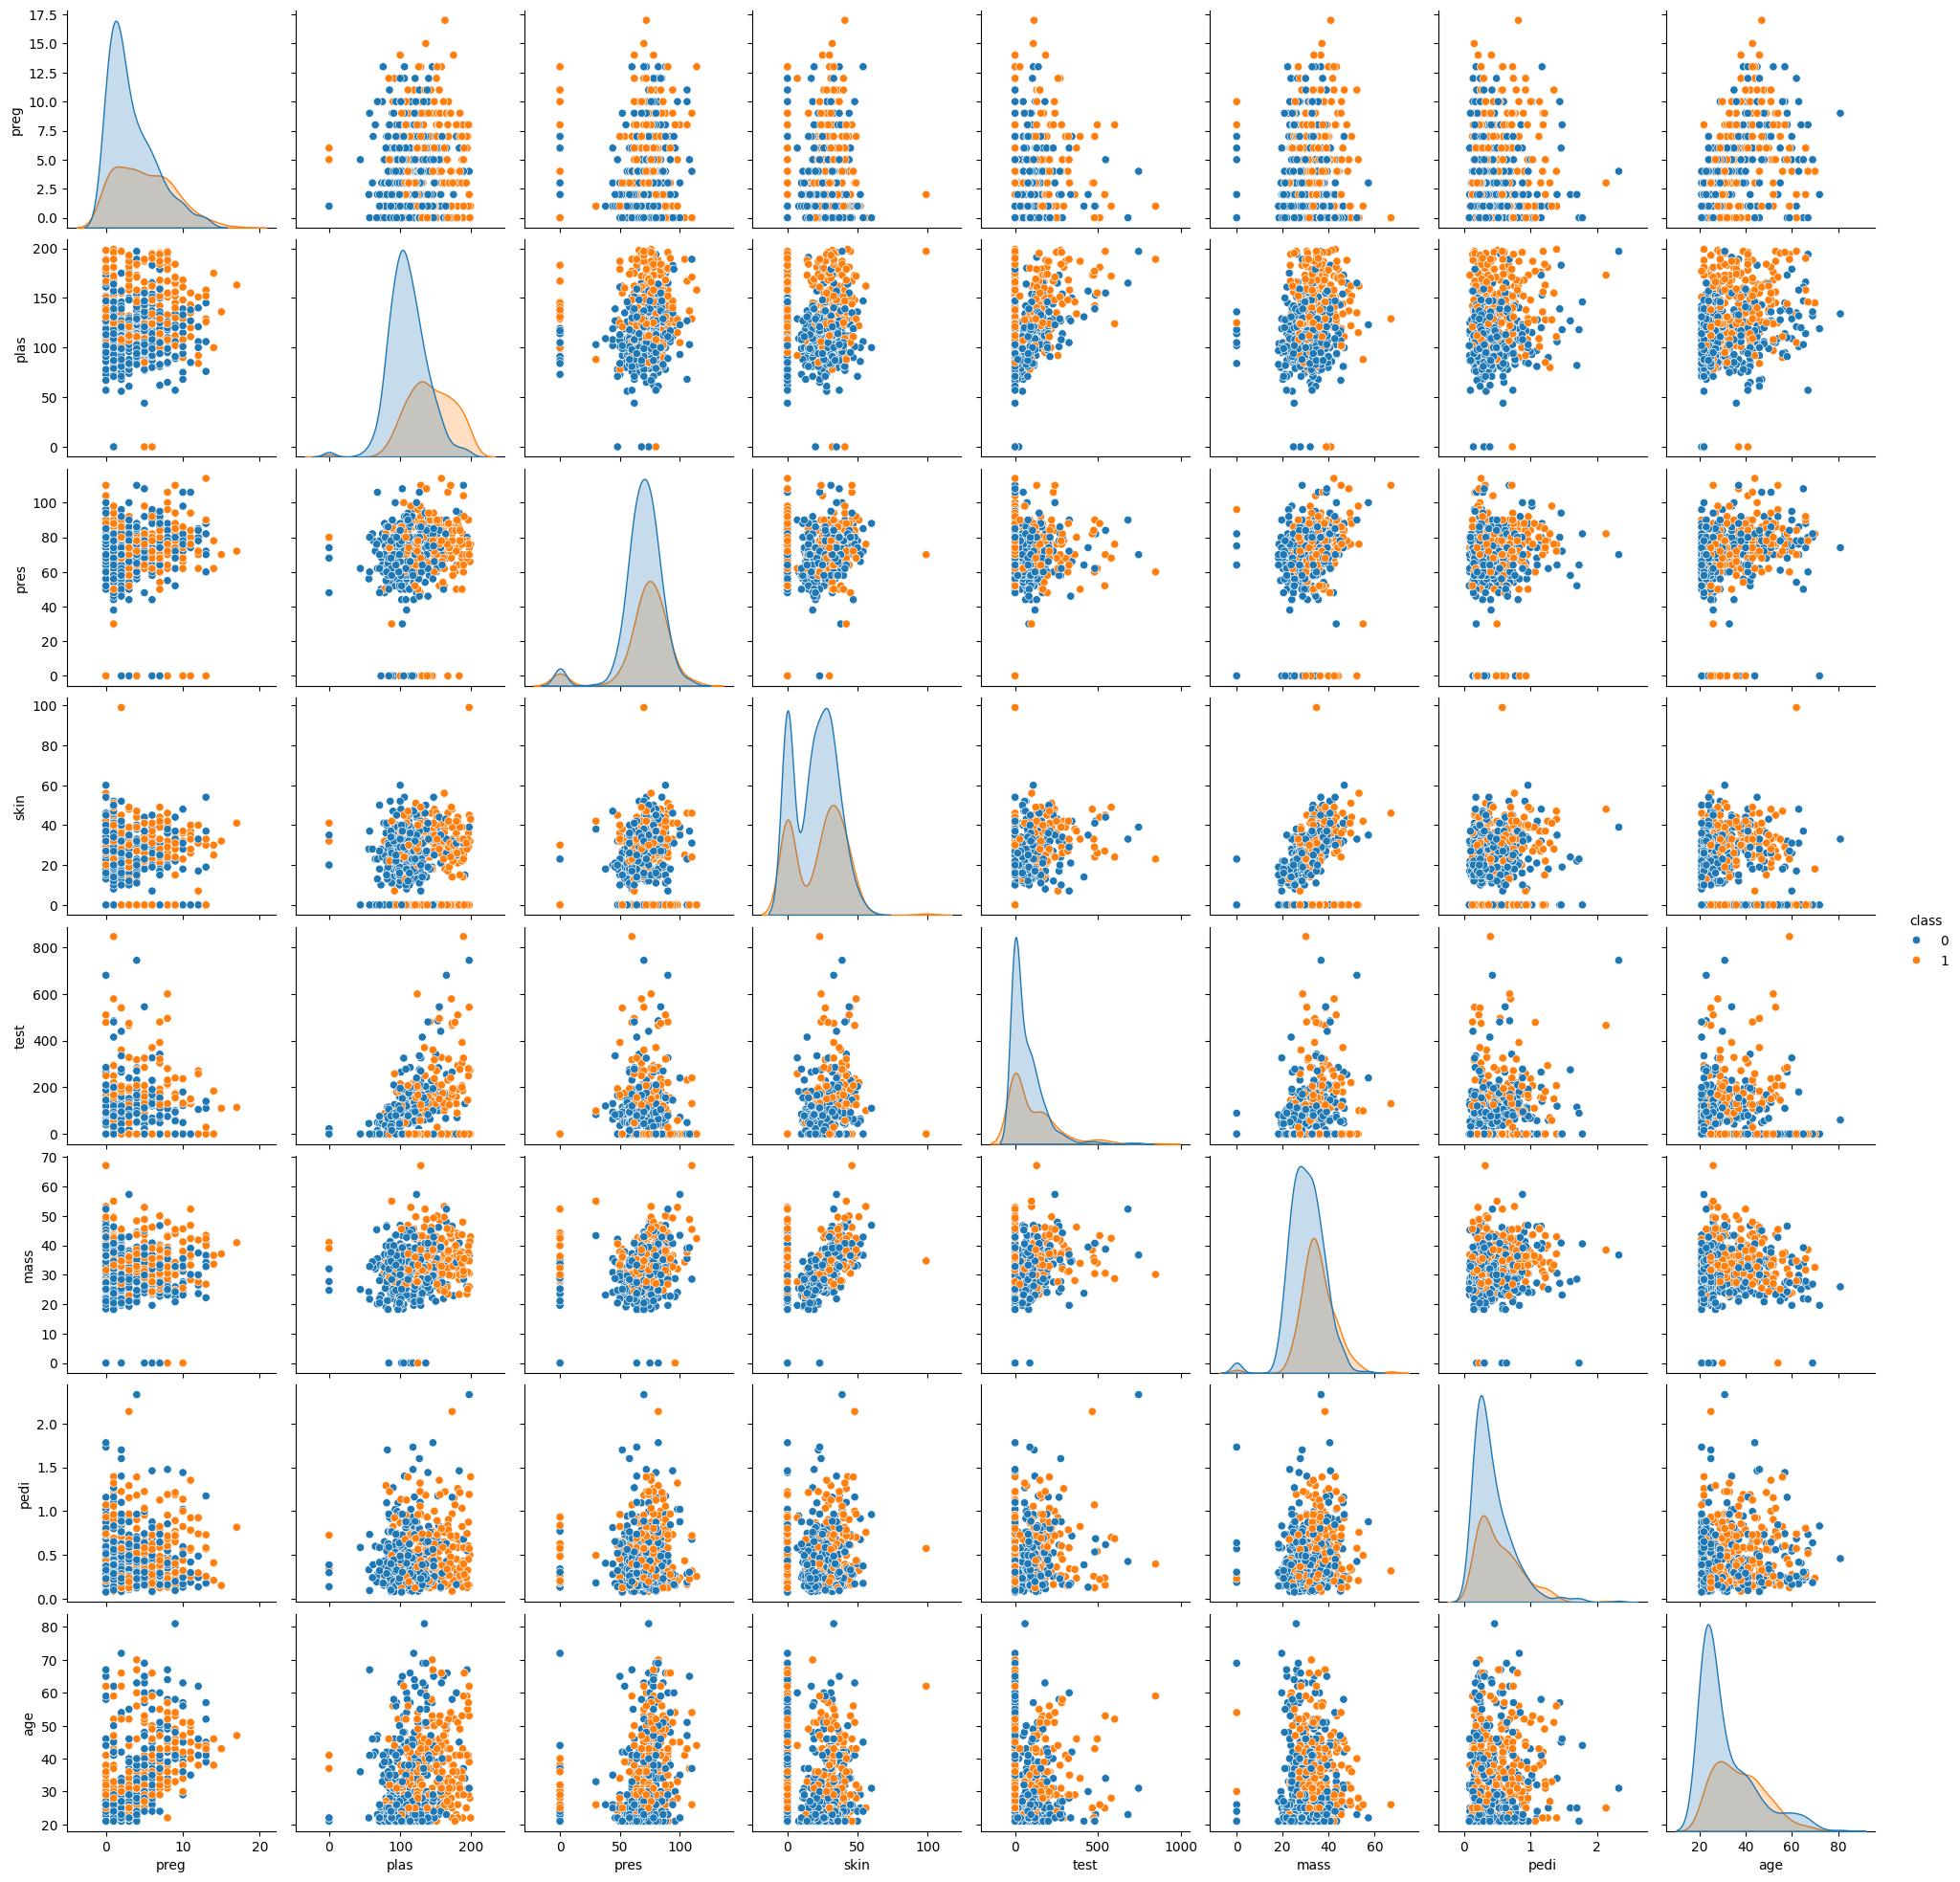

In [12]:
sns.pairplot(train_set, hue= target)

Todas las variables parece

<Axes: xlabel='class', ylabel='percent'>

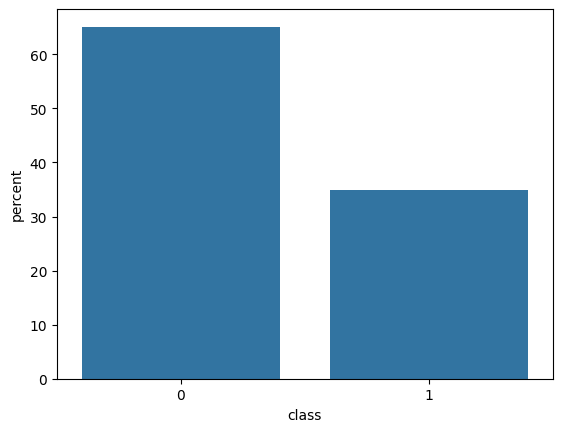

In [18]:
sns.countplot(data = df, x = target, stat="percent")

- La variable target esta muy desbalanceada

In [19]:
train_set.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.925081,121.584691,69.475570,20.661238,79.685668,32.072964,0.468743,33.566775,0.353420
std,3.400545,32.852309,18.926454,15.994980,118.668815,7.895084,0.317247,11.964245,0.478422
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,7.500000,32.250000,0.372500,29.000000,0.000000
75%,6.000000,141.750000,80.000000,32.000000,126.750000,36.675000,0.617750,41.000000,1.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.329000,81.000000,1.000000


In [20]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns= target), df[target], test_size= 0.2, random_state= 73)

In [21]:
model_names = ["Random Forest","XGBoost","LightGBM"]
rf_clf = RandomForestClassifier(random_state= 42)
xgb_clf = XGBClassifier(random_state = 42)
lgb_clf = LGBMClassifier(random_state= 42, verbose = -100)

model_set = [rf_clf, xgb_clf, lgb_clf]


In [22]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    metricas_cv[nombre] = cross_val_score(modelo, X_train, y_train, cv = 3, scoring = "balanced_accuracy")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

RandomForestClassifier(random_state=42)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
LGBMClassifier(random_state=42, verbose=-100)


In [23]:
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, Balanced_accuracy_CV: {np.mean(valores)}")
print(f"El ganador es {ganador}")

Model <Random Forest>, Balanced_accuracy_CV: 0.6993405837133307
Model <XGBoost>, Balanced_accuracy_CV: 0.6783093405299606
Model <LightGBM>, Balanced_accuracy_CV: 0.6670153876804923
El ganador es Random Forest


Voy a ajustar hiperparametros a todos para comparar los modelos

In [32]:
metricas_optimizadas = {}

In [33]:
param_grid = {"n_estimators": [200,300,500],
    "max_depth": [3,6,9],
    "min_samples_leaf": [10,20,40],
    "max_features": ["sqrt","log2",None],
    "class_weight": ["balanced", None]
}

rf_grid = GridSearchCV(rf_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring = "balanced_accuracy",
                       n_jobs = -1)

rf_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [10, 20, 40],
                         'n_estimators': [200, 300, 500]},
             scoring='balanced_accuracy')

In [53]:
print("Random_forest_score:", rf_grid.best_score_)
metricas_optimizadas["Random_Forest"] = rf_grid.best_score_

Random_forest_score: 0.7632443399256028


In [37]:
param_grid = {'max_depth': [3, 6, 10],
          'learning_rate': [0.1, 0.2, 0.3, 0.4],
          'subsample': np.arange(0.5, 1.0, 0.1),
          'colsample_bytree': np.arange(0.5, 1.0, 0.1),
          'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
          'n_estimators': [100, 200,300],
          "class_weight": ["balanced"]
          }

xgb_grid = GridSearchCV(xgb_clf, 
                               cv = 5,
                               param_grid= param_grid, 
                               scoring = "balanced_accuracy", 
                               n_jobs= -1)


xgb_grid.fit(X_train, y_train)
print("XGB best_score:", xgb_grid.best_score_)
metricas_optimizadas["XGBoost"] = xgb_grid.best_score_

XGB best_score: 0.7354872949393851


c:\Users\vanep\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:23:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


In [36]:
param_grid= {'max_depth': [3, 6, 10],
          'learning_rate': [0.1, 0.2, 0.3],
          'bagging_fraction': [0.3,0.6,1],
          'feature_fraction': [0.5,1],
          'n_estimators': [100, 200,300],
          'max_bins': [100,200],
          "class_weight": ["balanced", None]
          }

lgb_grid = GridSearchCV(lgb_clf, 
                               cv = 5,
                               param_grid= param_grid, 
                               scoring = "balanced_accuracy")


lgb_grid.fit(X_train, y_train)
print("LGB best_score:", lgb_grid.best_score_)
metricas_optimizadas["LightGBM"] = lgb_grid.best_score_

LGB best_score: 0.725313578826237


In [47]:
pd.DataFrame([metricas_optimizadas])

,XGBoost,LightGBM,Random_Forest
0,0.735487,0.725314,0.763244


Finalmente nos quedamos con Random Forest optimizado porque es el que mejor clasifica de todos los modelos que probamos, nos da un 0,76 de accuracy balanceado.

In [48]:
y_pred = rf_grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       103
           1       0.62      0.71      0.66        51

    accuracy                           0.76       154
   macro avg       0.73      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



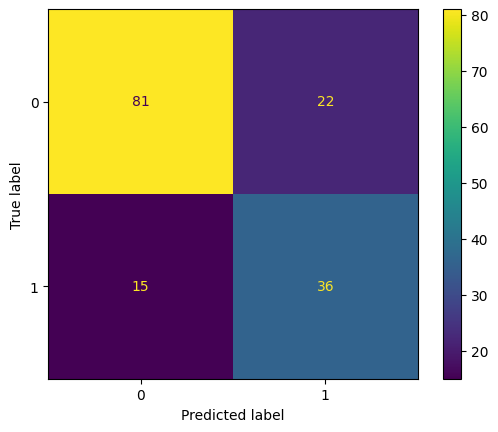

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

El recall medio del modelo contra los datos de test es 0,76, nos da igual que con los datos de entrenamiento por lo que podemos decir que no tenemos overfitting y que el modelo esta prediciendo bastante bien, es verdad que al estar la variable target tan desbalanceada vemos que predice mejor los pacientes que no van a tener diabetes y no tan bien a los que probablemente tengan y los clasifica como no.